<a href="https://colab.research.google.com/github/kaushik67/ceri8211globalgeophysics/blob/master/HW6_Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#HW6_problem_6
#Kaushik Sarker
from google.colab import files
file=files.upload()


Saving Hasterok-EPSL-2013-Data.xlsx to Hasterok-EPSL-2013-Data.xlsx


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
import io
data_frame=pd.read_excel(io.BytesIO(file['Hasterok-EPSL-2013-Data.xlsx']))

In [0]:
ss = data_frame.loc[3:11,:] #site specific data
ss.head(n=5)
ft = data_frame.loc[14:29,:] #filtered data
ft.head(n=5)
uf = data_frame.loc[32:,:] #unfiltered data
uf.head(n=5)
m = list(ss['Unnamed: 1'])+list(ft['Unnamed: 1'])+list(uf['Unnamed: 1'])

In [0]:
er_ss=ss.iloc[:,8]-ss.iloc[:,6] #site specific error interquartile range
er_ft=ft.iloc[:,8]-ft.iloc[:,6] #filtered error interquartile range
er_uf=uf.iloc[:,8]-uf.iloc[:,6] #unfiltered error interquartile range

In [0]:
def heat_flux(t):  #GDH1 model
  if t>55:
    q= 48+ 96 * np.exp(-.0278*t)
  else:
    q = 510/t**0.5
  return q

heat_flow=[]

for t in m:
  heat_flow.append(heat_flux(t))

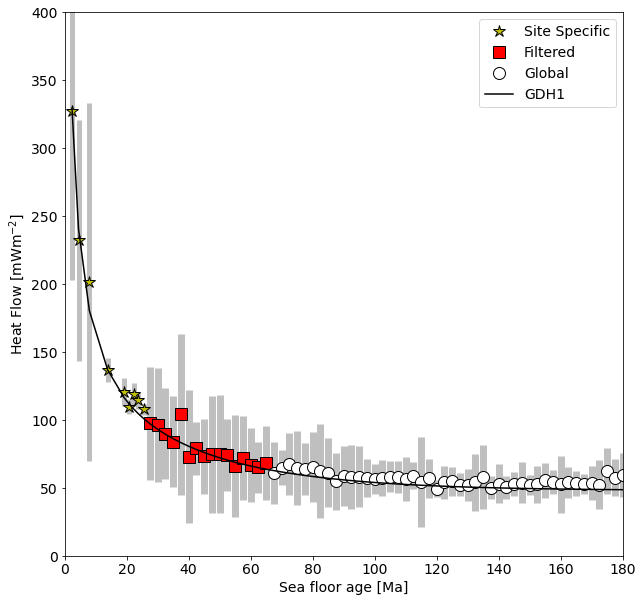

In [7]:
plt.figure(figsize=(10,10))
plt.plot(ss.iloc[:,1],ss.iloc[:,7],'y*', ft.iloc[:,1],ft.iloc[:,7],'rs',uf.iloc[:,1],uf.iloc[:,7],'wo', markersize=12, markeredgecolor='k')
plt.errorbar(ss.iloc[:,1],ss.iloc[:,7], yerr=er_ss, fmt='none', ecolor='gray', elinewidth=5, alpha=0.5)
plt.errorbar(ft.iloc[:,1], ft.iloc[:,7], yerr=er_ft, fmt='none', ecolor='gray', elinewidth=7, alpha=0.5)
plt.errorbar(uf.iloc[:,1],uf.iloc[:,7],yerr=er_uf, fmt='none', ecolor='gray', elinewidth=7, alpha=0.5)
plt.plot(m,heat_flow,'k-')
plt.xlim(0,180)
plt.ylim(0,400)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Site Specific", "Filtered", "Global", "GDH1"], fontsize=14)
plt.xlabel("Sea floor age [Ma]", fontsize=14)
plt.ylabel(r'Heat Flow [mWm$\mathregular{^{-2}}$]', fontsize=14)
plt.show()
